In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Check for missing values

In [47]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Fill missing values for age with median of similar Pclass and sex

In [48]:
def fill_age(row):
    # group by similar class
    median = df.groupby(['Pclass', 'Sex'])['Age'].median()
    
    # check for empty age rows
    if pd.isnull(row['Age']):
        return median.loc[(row['Pclass'], row['Sex'])]
    else:
        return row['Age']
    
df['Age'] = df.apply(fill_age, axis=1)

Fill empty rows for Embarked with most frequwnt

In [49]:
def fill_emb(data):
    freq = data['Embarked'].value_counts().idxmax()
    data['Embarked'] = data['Embarked'].replace(np.nan, freq)
    
fill_emb(df)

Create deck information from cabin variable, filling empty cells with unknown for deck

In [50]:
df['Deck'] = df['Cabin'].apply(lambda x: str(x)[0] if pd.notnull(x) else 'U')

Extract titles from name variable

In [51]:
import re

def extract_title(name):
    match = re.search(r',\s([A-Za-z]+)\.', name)
    if match:
        return match.group(1)
    return 'Unknown'

df['Title'] = df['Name'].apply(extract_title)

Map uncommon titles to single category

In [52]:
title_map = {
    'Mr': 'Mr',
    'Mrs': 'Mrs',
    'Miss': 'Miss',
    'Master': 'Master',
    'Dr': 'Dr',
    'Rev': 'Rev',
    'Col': 'Officer',
    'Major': 'Officer',
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    'Capt': 'Officer',
    'Countess': 'Noble',
    'Don': 'Noble',
    'Jonkheer': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Unknown': 'Unknown'
}

df['Title'] = df['Title'].map(title_map)

In [53]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Deck             0
Title            0
dtype: int64

Exploratory data analysis

In [54]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,204,891,891,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,9,9
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S,U,Mr
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,646,687,517
mean,446.000000,0.383838,2.308642,NaN,NaN,29.112424,0.523008,0.381594,NaN,32.204208,NaN,NaN,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.304424,1.102743,0.806057,NaN,49.693429,NaN,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,21.500000,0.000000,0.000000,NaN,7.910400,NaN,NaN,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,26.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,36.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,NaN,NaN


Visualize the relationship between passenger class and survival

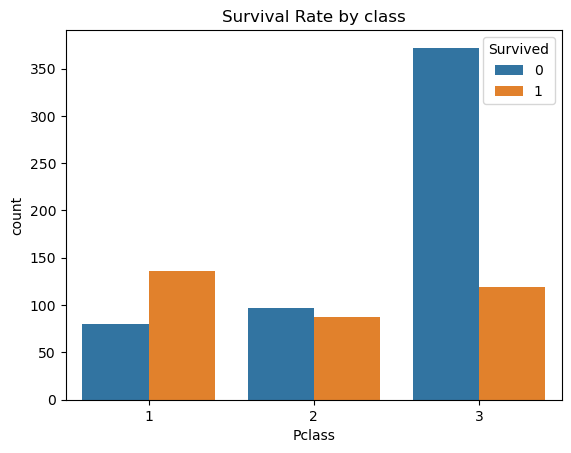

In [55]:
sns.countplot(df, x='Pclass', hue='Survived')
plt.title('Survival Rate by class')
plt.show()

In [56]:
df[['Pclass', 'Survived']].groupby('Pclass').agg({'Pclass':'count','Survived':'mean'})

,Pclass,Survived
Pclass,,
1,216,0.629630
2,184,0.472826
3,491,0.242363


It shows that passengers in first class had a much higher survival rate than others classes

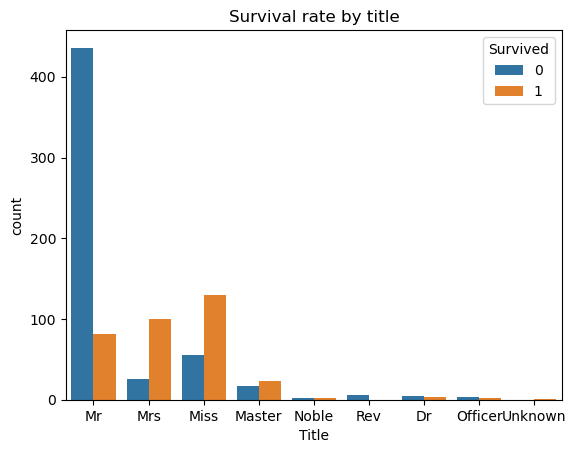

In [57]:
#visualize the relationship between survival and title
sns.countplot(df, x='Title', hue='Survived')
plt.title('Survival rate by title')
plt.show()

In [58]:
df[['Title', 'Survived']].groupby('Title').agg({'Title':'count', 'Survived':'mean'})

,Title,Survived
Title,,
Dr,7,0.428571
Master,40,0.575000
Miss,185,0.702703
Mr,517,0.156673
Mrs,126,0.793651
Noble,4,0.500000
Officer,5,0.400000
Rev,6,0.000000
Unknown,1,1.000000


This indicated that Mr and Rev little and no survival, Mrs and Miss had a much higher survival rate

**Relationship between survival and sex**

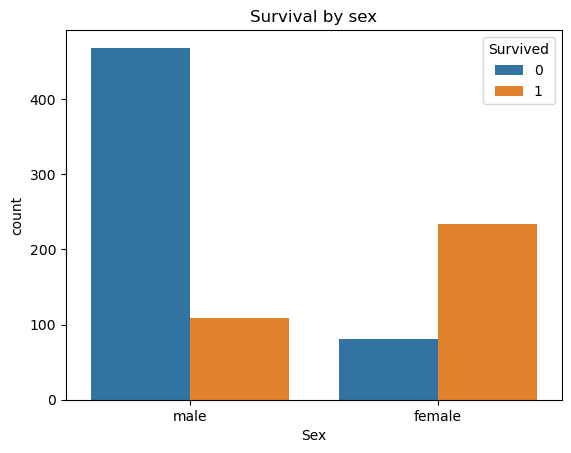

In [59]:
sns.countplot(df, x='Sex', hue='Survived')
plt.title('Survival by sex')
plt.show()

In [60]:
df[['Sex', 'Survived']].groupby('Sex').agg({'Sex':'count', 'Survived':'mean'})

,Sex,Survived
Sex,,
female,314,0.742038
male,577,0.188908


indicates men had much less survival than women

In [61]:
# Exploring the survival of different sex in various passenger classes
df[['Pclass', 'Sex', 'Survived']].groupby(['Sex', 'Pclass']).agg({'Survived':['mean', 'count']})

Survived      
                   mean count
Sex    Pclass                
female 1       0.968085    94
       2       0.921053    76
       3       0.500000   144
male   1       0.368852   122
       2       0.157407   108
       3       0.135447   347

this shows a better relationship so we create a variable which combines sex and Pclass

In [62]:
df['Sex_class'] = df['Sex'] + df['Pclass'].astype(str)
df[['Sex', 'Pclass', 'Sex_class']].head()

,Sex,Pclass,Sex_class
0,male,3,male3
1,female,1,female1
2,female,3,female3
3,female,1,female1
4,male,3,male3


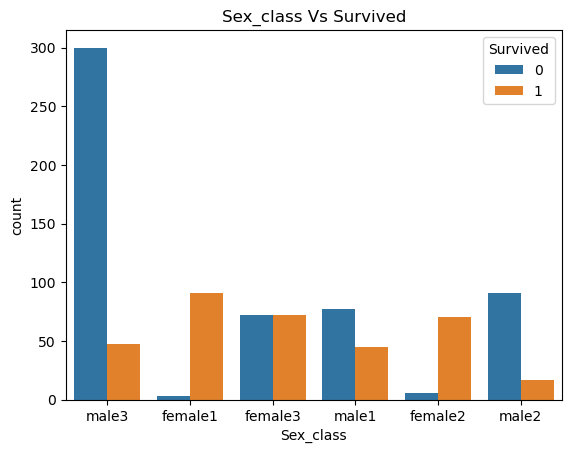

In [63]:
# visualize the relationship between Sex_class and survived
sns.countplot(df, x = 'Sex_class', hue='Survived')
plt.title('Sex_class Vs Survived')
plt.show()

Analysing the relationship between age and survival

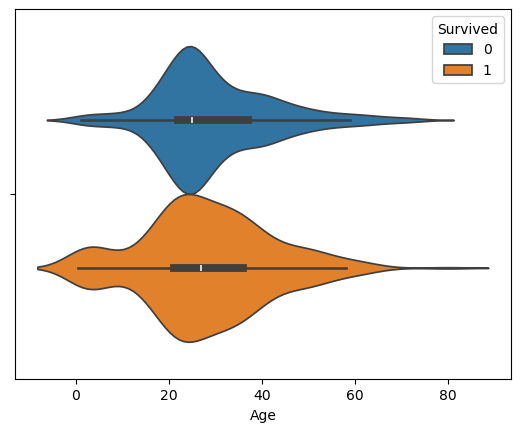

In [64]:
sns.violinplot(df, x='Age', hue='Survived')
plt.show()

Shows that most poeple who both survived and did not are in the 20s range making age on it's own a poor determining factor

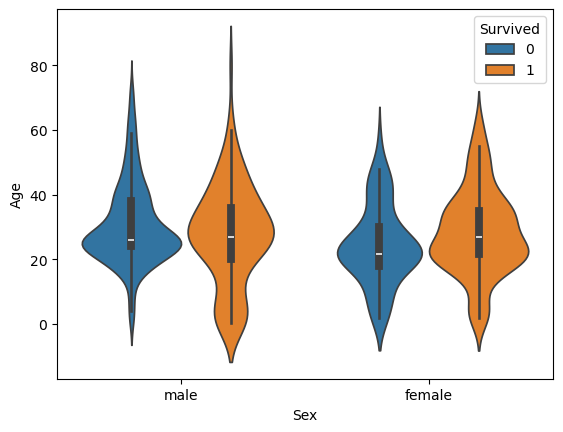

In [65]:
sns.violinplot(df, x='Sex', y='Age', hue='Survived')
plt.show()

This shows only that more younger males survived than did not survive

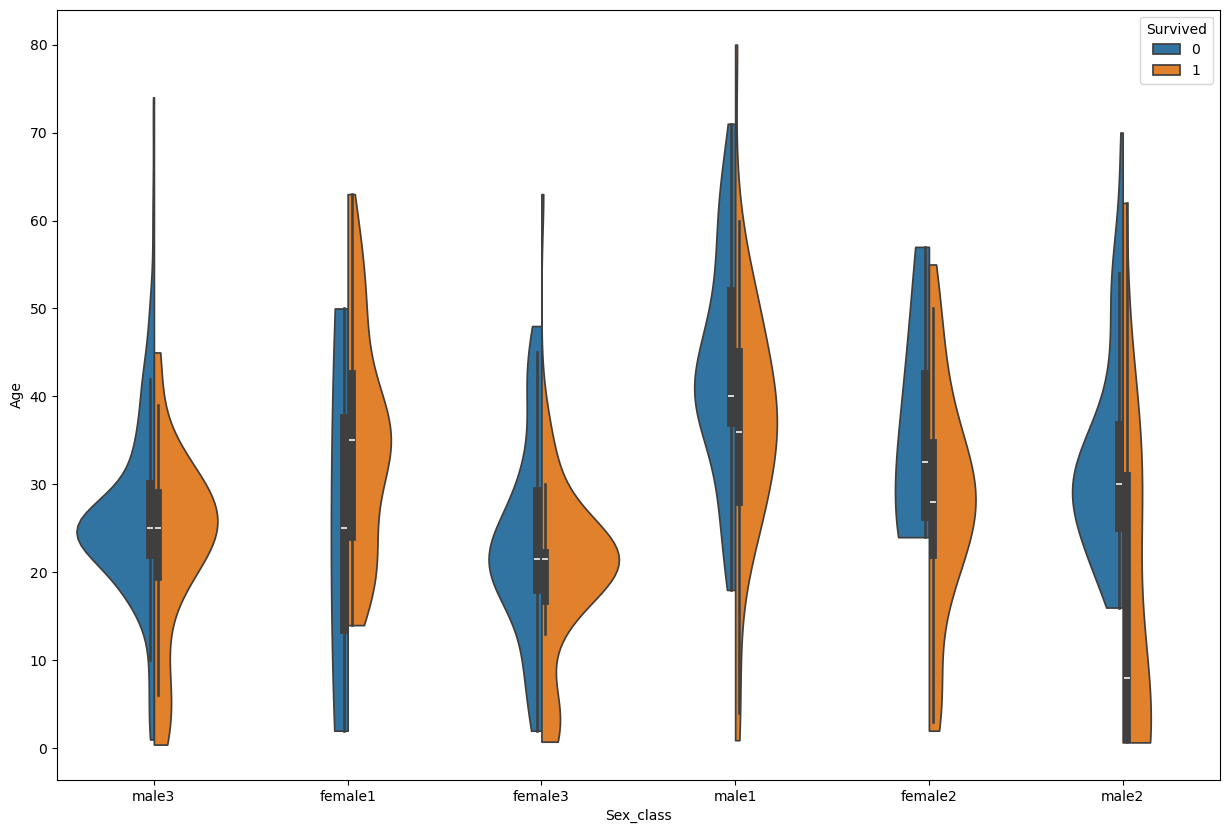

In [66]:
plt.figure(figsize=(15, 10))
sns.violinplot(df, y='Age', x='Sex_class', hue='Survived', split=True, cut=0)
plt.show()

this futher shows a general higher survival in younger persons below age of 18

In [67]:
# create age bins

bins = np.array([0, 15, 30, 80])
labels = ['younger', 'youth', 'older']

df['Age_binned'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

In [68]:
df[['Age', 'Age_binned']].sample(10)

,Age,Age_binned
140,21.5,youth
179,36.0,older
517,25.0,youth
887,19.0,youth
306,35.0,older
389,17.0,youth
107,25.0,youth
526,50.0,older
579,32.0,older
363,35.0,older


In [69]:
# create family feature to include sib and parent
df['Family'] = df['SibSp'] + df['Parch']

<Axes: xlabel='Family', ylabel='count'>

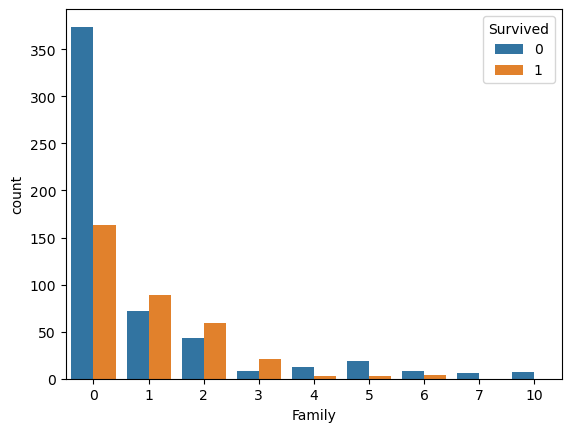

In [70]:
sns.countplot(df, x='Family', hue='Survived')

This indicates passengers with 1 - 3 family on board had higher ratio of survival than passengers with none or higher 

In [71]:
bins = [0, 1, 3, 12]
labels = ['None', 'Small', 'Large']

df['Fam_binned'] = pd.cut(df['Family'], bins=bins, labels=labels, include_lowest=True)

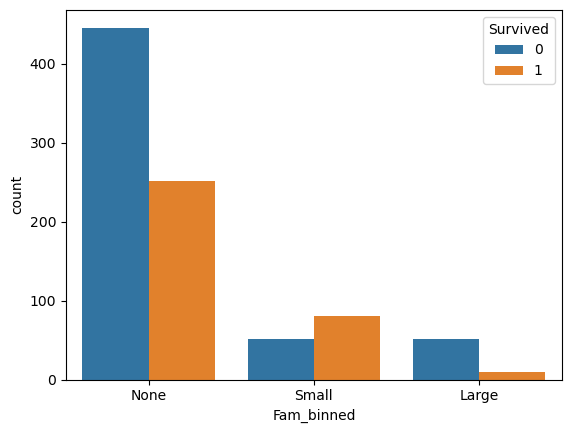

In [72]:
sns.countplot(df, x='Fam_binned', hue='Survived')
plt.show()

In [73]:
# create a name lenght feature from vairable name
df['Name_len'] = df['Name'].apply(lambda x: len(x))
df[['Name', 'Name_len']].sample(5)

,Name,Name_len
768,"Moran, Mr. Daniel J",19
466,"Campbell, Mr. William",21
868,"van Melkebeke, Mr. Philemon",27
382,"Tikkanen, Mr. Juho",18
174,"Smith, Mr. James Clinch",23


In [74]:
df['Survived'].groupby(pd.qcut(df['Name_len'], 5)).mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_7508\72298956.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Survived'].groupby(pd.qcut(df['Name_len'], 5)).mean()


Name_len
(11.999, 19.0]    0.220588
(19.0, 23.0]      0.301282
(23.0, 27.0]      0.319797
(27.0, 32.0]      0.442424
(32.0, 82.0]      0.674556
Name: Survived, dtype: float64

Indicates that persons with longer names had higher survival

In [75]:
df['Ticket_len'] = df['Ticket'].apply(lambda x: len(x))

df.groupby('Ticket_len')['Survived'].mean()

Ticket_len
3     0.000000
4     0.366337
5     0.618321
6     0.319809
7     0.296296
8     0.539474
9     0.192308
10    0.341463
11    0.250000
12    0.400000
13    0.400000
15    0.333333
16    0.272727
17    0.428571
18    0.000000
Name: Survived, dtype: float64

<Axes: xlabel='Deck', ylabel='count'>

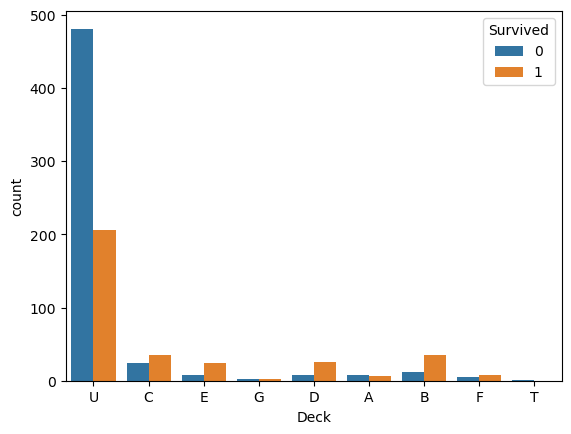

In [76]:
sns.countplot(df, x='Deck', hue='Survived')

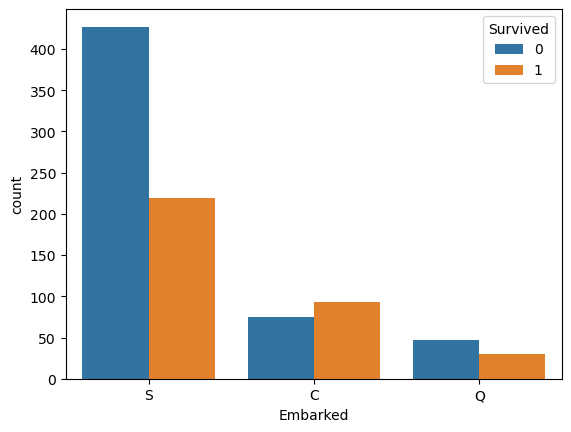

In [77]:
sns.countplot(df, x='Embarked', hue='Survived')
plt.show()

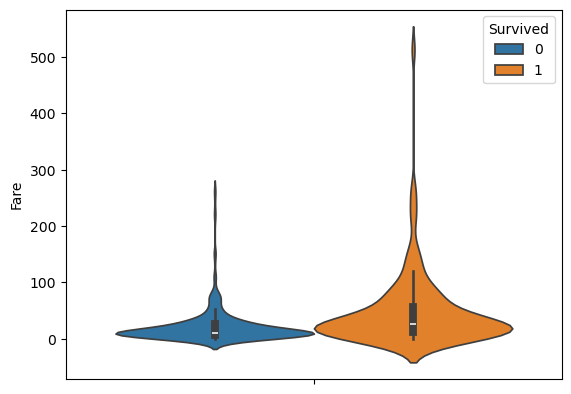

In [78]:
sns.violinplot(df, y='Fare', hue='Survived')
plt.show()

In [79]:
h, l = df['Fare'].max(), df['Fare'].min()

bins = [l, 150, 300, h]
labels = ['C', 'M', 'E']

df["Fare_class"] = pd.cut(df['Fare'], bins=bins, labels=labels, include_lowest=True)
df[['Fare', 'Fare_class']].sample(5)

,Fare,Fare_class
400,7.9250,C
789,79.2000,C
458,10.5000,C
179,0.0000,C
514,7.4958,C


<Axes: xlabel='Fare_class', ylabel='count'>

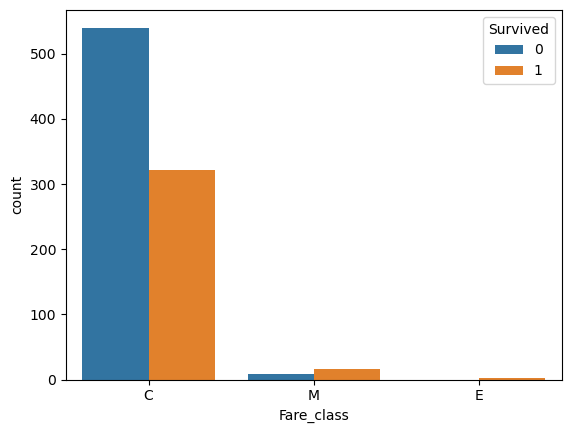

In [80]:
sns.countplot(df, x='Fare_class', hue='Survived')

In [81]:
pd.set_option('display.max_columns', None)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title,Sex_class,Age_binned,Family,Fam_binned,Name_len,Ticket_len,Fare_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,U,Mr,male3,youth,1,None,23,9,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs,female1,older,1,None,51,8,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,U,Miss,female3,youth,0,None,22,16,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs,female1,older,1,None,44,6,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,U,Mr,male3,older,0,None,24,6,C


In [117]:
X = df[['Pclass', 'Age', 'Fare', 'Title', 'Sex', 'Sex_class', 'Age_binned', 'Fam_binned', 'Name_len', 'Deck', 'Embarked', 'Fare_class', 'Ticket_len']].copy()
X.head()

,Pclass,Age,Fare,Title,Sex,Sex_class,Age_binned,Fam_binned,Name_len,Deck,Embarked,Fare_class,Ticket_len
0,3,22.0,7.2500,Mr,male,male3,youth,None,23,U,S,C,9
1,1,38.0,71.2833,Mrs,female,female1,older,None,51,C,C,C,8
2,3,26.0,7.9250,Miss,female,female3,youth,None,22,U,S,C,16
3,1,35.0,53.1000,Mrs,female,female1,older,None,44,C,S,C,6
4,3,35.0,8.0500,Mr,male,male3,older,None,24,U,S,C,6


In [83]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

def encode(data):
    for x in list(data.columns):
        if str(data[x].dtype) != 'int64':
            data[x] = le.fit_transform(data[x])
    return data

  

In [84]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

X = scale.fit_transform(X)
Y = df['Survived'].to_numpy()


In [85]:
from sklearn.model_selection import train_test_split, GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

x_train.shape, y_train.shape

((712, 13), (712,))

In [86]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# params = {
#     'criterion':['gini', 'entropy', 'log_loss'],
#     'n_estimators': [100, 200, 300],
#     'max_depth':[None, 10, 20, 30],
#     'min_samples_split':[2, 4, 10],
#     'min_samples_leaf':[1, 2, 4], 
#     'max_features':['sqrt', 'log2']
# }

# rf = RandomForestClassifier(random_state=9, class_weight='balanced')

# rf_grid = GridSearchCV(rf, params, cv=5, n_jobs=1, verbose=2)
# rf_grid.fit(x_train, y_train)

In [87]:
# rf_grid.best_params_, rf_grid.best_score_

<code>
({'criterion': 'entropy',
  'max_depth': 20,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 4,
  'n_estimators': 200},
 0.8454742440657934)
</code>

In [88]:
def plot_matrix(y, pred):
    
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y, pred)
    
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_xlabel('Pred')
    ax.set_ylabel('True')
    ax.xaxis.set_ticklabels(['died', 'survived'])
    ax.yaxis.set_ticklabels(['died', 'survived'])
    
    plt.show()

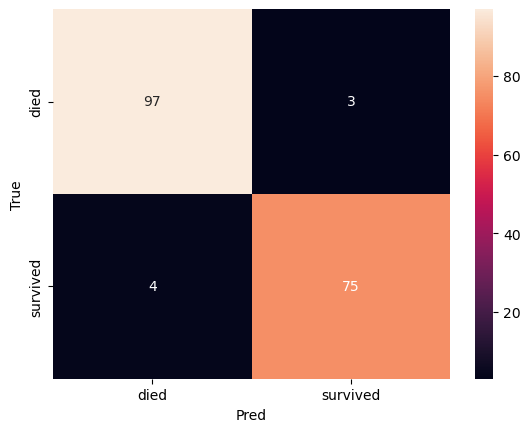

In [90]:
rf_best = RandomForestClassifier(criterion='entropy',
                                 max_depth=20,
                                 max_features='sqrt',
                                 min_samples_leaf=1,
                                 min_samples_split=4,
                                 n_estimators=200)
rf_best.fit(x_test, y_test)
y_pred = rf_best.predict(x_test)

plot_matrix(y_test, y_pred)

In [91]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced')

params = {
    'C':[0.001, 0.01, 0.1, 1, 10],
    'penalty':['l2', 'l1'],
    'solver':['liblinear', 'saga']
}

lg_grid = GridSearchCV(lr, params, cv=6)
lg_grid.fit(x_train, y_train)

GridSearchCV(cv=6, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l2', 'l1'],
                         'solver': ['liblinear', 'saga']})

In [92]:
lg_grid.best_params_, lg_grid.best_score_

({'C': 10, 'penalty': 'l2', 'solver': 'saga'}, 0.8258438968807863)

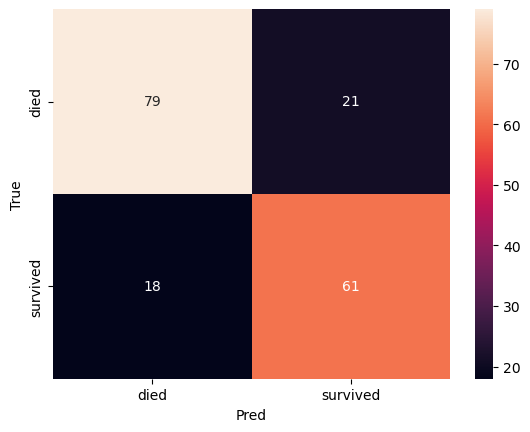

In [93]:
y_pred = lg_grid.best_estimator_.predict(x_test)

plot_matrix(y_test, y_pred)

In [94]:
from sklearn.svm import SVC

svm = SVC()

params = {'kernel':('linear', 'rbf', 'sigmoid', 'poly')}

svm_grid = GridSearchCV(svm, params, cv=7)
svm_grid.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=SVC(),
             param_grid={'kernel': ('linear', 'rbf', 'sigmoid', 'poly')})

In [95]:
svm_grid.best_params_, svm_grid.best_score_

({'kernel': 'rbf'}, 0.8384779654436031)

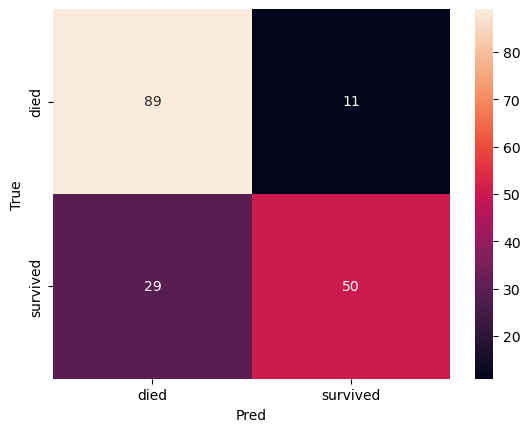

In [96]:
y_pred = svm_grid.best_estimator_.predict(x_test)

plot_matrix(y_test, y_pred)

In [132]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_pred)

0.5555555555555556

In [116]:
import xgboost as xbg
from xgboost import XGBClassifier

In [119]:
xgb = XGBClassifier(random_state=9)

params = {
    'n_estimators':[450, 500, 550],
    'colsample_bytree':[0.75, 0.8, 0.85],
    'max_depth':[None, 1, 4],
    'reg_alpha':[1],
    'reg_lambda':[2, 5, 10],
    'subsample':[0.55, 0.6, 0.65],
    'learning_rate':[0.5],
    'gamma':[0.5, 1, 2],
    'min_child_weight':[0.01],
    'sampling_method':['uniform']
}

xgb_grid = GridSearchCV(xgb, params, cv=7, verbose=2)
xgb_grid.fit(x_train, y_train)

Fitting 7 folds for each of 729 candidates, totalling 5103 fits
[CV] END colsample_bytree=0.75, gamma=0.5, learning_rate=0.5, max_depth=None, min_child_weight=0.01, n_estimators=450, reg_alpha=1, reg_lambda=2, sampling_method=uniform, subsample=0.55; total time=   0.4s
[CV] END colsample_bytree=0.75, gamma=0.5, learning_rate=0.5, max_depth=None, min_child_weight=0.01, n_estimators=450, reg_alpha=1, reg_lambda=2, sampling_method=uniform, subsample=0.55; total time=   0.4s
[CV] END colsample_bytree=0.75, gamma=0.5, learning_rate=0.5, max_depth=None, min_child_weight=0.01, n_estimators=450, reg_alpha=1, reg_lambda=2, sampling_method=uniform, subsample=0.55; total time=   0.3s
[CV] END colsample_bytree=0.75, gamma=0.5, learning_rate=0.5, max_depth=None, min_child_weight=0.01, n_estimators=450, reg_alpha=1, reg_lambda=2, sampling_method=uniform, subsample=0.55; total time=   0.3s
[CV] END colsample_bytree=0.75, gamma=0.5, learning_rate=0.5, max_depth=None, min_child_weight=0.01, n_estimator

GridSearchCV(cv=7,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=9, ...),
             param_grid={'colsample_bytree': [0.75, 0.8, 0.85],
                         'gamma': [0.5, 1, 2], 'learning_rate': [0.5],
                         'max_depth': [None, 1, 4], 'min_child_weight': [0.01],
                         'n_estimators': [450, 500, 550], 'reg_alpha': [1],
                         'reg_lambda': [2, 5, 10],
                         'sampling_method': ['uniform'],
                         'subsample': [0.55, 0.6, 0.65]},
             verbose=2)

In [120]:
xgb_grid.best_params_, xgb_grid.best_score_

({'colsample_bytree': 0.8,
  'gamma': 1,
  'learning_rate': 0.5,
  'max_depth': 4,
  'min_child_weight': 0.01,
  'n_estimators': 550,
  'reg_alpha': 1,
  'reg_lambda': 2,
  'sampling_method': 'uniform',
  'subsample': 0.65},
 0.8581135424466816)

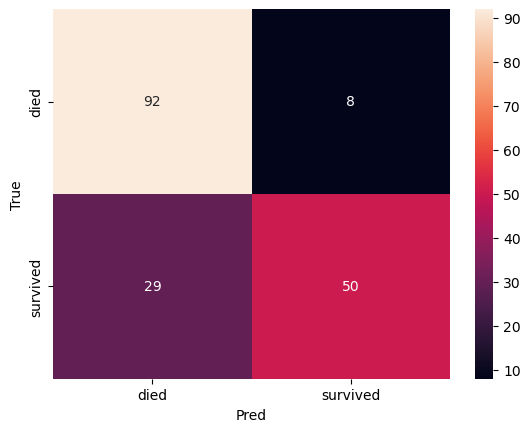

In [121]:
y_pred = xgb_grid.best_estimator_.predict(x_test)

plot_matrix(y_test, y_pred)

In [102]:
# prepare test data

def prep_data(data):
    '''This function prepares the data and create features for model implementation'''
    
    data['Age'] = data.apply(fill_age, axis=1)
    fill_emb(data)
    data['Deck'] = data['Cabin'].apply(lambda x: str(x)[0] if pd.notnull(x) else 'U')
    data['Title'] = data['Name'].apply(extract_title)
    data['Title'] = data['Title'].map(title_map)
    data['Sex_class'] = data['Sex'] + data['Pclass'].astype(str)
    bins = np.array([0, 15, 30, 80])
    labels = ['younger', 'youth', 'older']

    data['Age_binned'] = pd.cut(data['Age'], bins=bins, labels=labels, include_lowest=True)
    data['Family'] = data['SibSp'] + data['Parch']
    bins = [0, 1, 3, 12]
    labels = ['None', 'Small', 'Large']
    
    data['Fare'] = data['Fare'].replace(np.nan, data['Fare'].median())

    data['Fam_binned'] = pd.cut(data['Family'], bins=bins, labels=labels, include_lowest=True)
    
    # create a name lenght feature from vairable name
    data['Name_len'] = data['Name'].apply(lambda x: len(x))
    
    data['Ticket_len'] = data['Ticket'].apply(lambda x: len(x))
    
    bins = [l, 150, 300, h]
    labels = ['C', 'M', 'E']
    data["Fare_class"] = pd.cut(data['Fare'], bins=bins, labels=labels, include_lowest=True)
    
    X = data[['Pclass', 'Age', 'Fare', 'Title', 'Sex', 'Sex_class', 'Age_binned', 'Fam_binned', 'Name_len', 'Deck', 'Embarked', 'Fare_class', 'Ticket_len']].copy()

    X = encode(X)  
    
    X = scale.fit_transform(X)
    
    return data, X    

In [106]:
test_data = pd.read_csv('test.csv')

preped, features = prep_data(test_data)
preped.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title,Sex_class,Age_binned,Family,Fam_binned,Name_len,Ticket_len,Fare_class
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,U,Mr,male3,older,0,None,16,6,C
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,U,Mrs,female3,older,1,None,32,6,C
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,U,Mr,male2,older,0,None,25,6,C
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,U,Mr,male3,youth,0,None,16,6,C
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,U,Mrs,female3,youth,2,Small,44,7,C


In [104]:
preped.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Deck             0
Title            1
Sex_class        0
Age_binned       0
Family           0
Fam_binned       0
Name_len         0
Ticket_len       0
Fare_class       0
dtype: int64

In [107]:
features[5:]

array([[1.        , 0.21518987, 0.2202381 , ..., 1.        , 0.        ,
        0.06666667],
       [1.        , 0.49367089, 0.08333333, ..., 0.5       , 0.        ,
        0.2       ],
       [0.5       , 0.41772152, 0.5952381 , ..., 1.        , 0.        ,
        0.2       ],
       ...,
       [1.        , 0.64556962, 0.05357143, ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.40506329, 0.18452381, ..., 1.        , 0.        ,
        0.2       ],
       [1.        , 0.40506329, 0.5       , ..., 0.        , 0.        ,
        0.06666667]])

In [108]:
prediction = rf_best.predict(features)

In [113]:
test_data['Survived'] = prediction
submit = test_data[['PassengerId', 'Survived']]

In [114]:
submit.set_index('PassengerId', inplace=True)
submit.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [115]:
submit.to_csv('predictions2.csv')